In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [4]:
#reading in data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [5]:
#cleaning

#removing nulls
df = df[df['track_name'].notnull()]

#removing playlist variables
df = df.drop(columns = ['playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'])

# Filter to only unique track_ids
df = df.drop_duplicates(subset=['track_id'])

# Remove the 1 row where tempo is 0 (a song can't have a tempo of 0)
df = df[df['tempo'] != 0]

In [6]:
# split into train and test
X = df[['track_artist','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
y = df[['track_popularity']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [7]:
#preprocess data
num_col = ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
cat_col = ['track_artist']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer',SimpleImputer(strategy='mean')),
            ('poly_features',PolynomialFeatures(degree=2, include_bias=False)),
            ('scaler',StandardScaler())
            ]), num_col), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ]
)

In [ ]:
# Decision Tree
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

dt.fit(Xtrain, ytrain)


In [ ]:
y_pred_train_dt = dt.predict(Xtrain)
f1_train = f1_score(ytrain, y_pred_train_dt, average='weighted')

y_pred_test_dt = dt.predict(Xtest)
f1_test = f1_score(ytest, y_pred_test_dt, average='weighted')

print(f"F1 train score: {f1_train}")
print(f"F1 test score: {f1_test}")
#way overfit:(

F1 train score: 0.9809857217793547
F1 test score: 0.028859714372729037


In [32]:
# linear regression
lm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear_regression',LinearRegression())
])

#lm = LinearRegression()
lm.fit(Xtrain,ytrain)
y_pred_train_lm = lm.predict(Xtrain)
y_pred_test_lm = lm.predict(Xtest)

mse_train = mean_squared_error(ytrain,y_pred_train_lm)
mse_test = mean_squared_error(ytest,y_pred_test_lm)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")
print(f"RMSE Train: {np.sqrt(mse_train)}")
print(f"RMSE Test: {np.sqrt(mse_test)}")

MSE Train: 231.9835415997971
MSE Test: 481.88700901062606
RMSE Train: 15.231005928690236
RMSE Test: 21.951924950004408


In [8]:
knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn',KNeighborsRegressor(n_neighbors=5))
])

knn.fit(Xtrain,ytrain)
y_pred_train_knn = knn.predict(Xtrain)
y_pred_test_knn = knn.predict(Xtest)

In [ ]:
mse_train = mean_squared_error(ytrain,y_pred_train_knn)
mse_test = mean_squared_error(ytest,y_pred_test_knn)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")
print(f"RMSE Train: {np.sqrt(mse_train)}")
print(f"RMSE Test: {np.sqrt(mse_test)}")


#numbers wrong

MSE Train: 499.8883336207392
MSE Test: 539.8623437108101
RMSE Train: 22.358182699422134
RMSE Test: 23.234937996706815


In [27]:
knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn',KNeighborsRegressor(n_neighbors=30))
])

knn.fit(Xtrain,ytrain)
y_pred_train_knn = knn.predict(Xtrain)
y_pred_test_knn = knn.predict(Xtest)

In [29]:
mse_train = mean_squared_error(ytrain,y_pred_train_knn)
mse_test = mean_squared_error(ytest,y_pred_test_knn)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")

print(f"RMSE Train: {np.sqrt(mse_train)}")
print(f"RMSE Test: {np.sqrt(mse_test)}")

MSE Train: 499.8883336207392
MSE Test: 539.8623437108101
RMSE Train: 22.358182699422134
RMSE Test: 23.234937996706815


In [24]:
#nn = Pipeline(steps=[
#    ('preprocessor', preprocessor)
#])
X_nocol = df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
X_train, X_test, y_train, y_test = train_test_split(X_nocol, y, test_size=0.2)

# neural network

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the feedforward neural network model

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#X_train = np.array(Xtrain, dtype=np.float32)

#y_train = np.array(ytrain, dtype=np.float32)

#X_test = np.array(Xtest, dtype=np.float32)

#y_test = np.array(ytest, dtype=np.float32)


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions

predictions = model.predict(X_test)

Epoch 1/100
567/567 [==============================] - 4s 3ms/step - loss: 175402.2188 - val_loss: 981.9913
Epoch 2/100
567/567 [==============================] - 1s 2ms/step - loss: 1470.0416 - val_loss: 4351.6855
Epoch 3/100
567/567 [==============================] - 1s 2ms/step - loss: 5913.1450 - val_loss: 6290.7749
Epoch 4/100
567/567 [==============================] - 2s 3ms/step - loss: 23538.0391 - val_loss: 1729.6741
Epoch 5/100
567/567 [==============================] - 2s 3ms/step - loss: 28108.0898 - val_loss: 813.4977
Epoch 6/100
567/567 [==============================] - 2s 3ms/step - loss: 17886.4277 - val_loss: 1617.7267
Epoch 7/100
567/567 [==============================] - 2s 3ms/step - loss: 11898.9717 - val_loss: 964.3400
Epoch 8/100
567/567 [==============================] - 2s 3ms/step - loss: 25589.8145 - val_loss: 2544.1145
Epoch 9/100
567/567 [==============================] - 2s 4ms/step - loss: 15463.1377 - val_loss: 1601.0219
Epoch 10/100
567/567 [==========

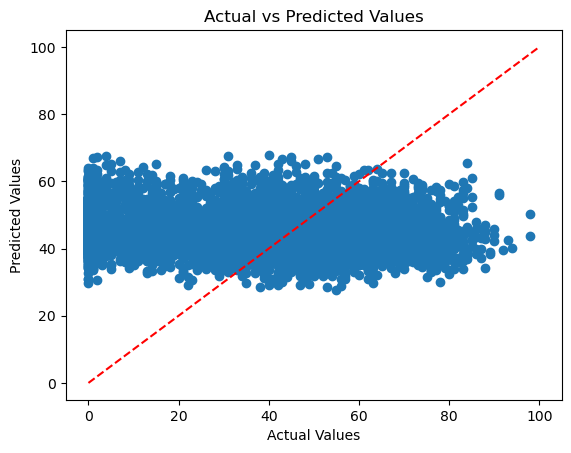

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.show()

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: -0.18345466176962555


In [30]:
np.std(df['track_popularity'])

23.698291843622776

In [21]:
Xtrain

,track_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
17511,Maná,0.791,0.782,7,-4.973,1,0.0289,0.143000,0.000004,0.1070,0.635,115.992,264720
9163,Westside Connection,0.748,0.773,2,-6.420,0,0.2830,0.152000,0.000000,0.1980,0.873,77.895,224573
11389,オメガトライブ,0.759,0.712,9,-6.746,0,0.0366,0.416000,0.000004,0.0775,0.942,132.988,271600
5694,Wun Two,0.636,0.148,8,-13.895,1,0.0815,0.247000,0.748000,0.1110,0.565,80.960,94815
1426,Christopher Wilde,0.333,0.902,3,-4.650,1,0.1230,0.027900,0.000000,0.1150,0.601,185.539,196893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,Ivan R,0.681,0.577,7,-9.602,1,0.0632,0.018900,0.000010,0.1020,0.370,175.940,199389
25855,India.Arie,0.697,0.445,5,-7.081,1,0.0638,0.263000,0.002740,0.1330,0.396,119.943,296107
25811,Boyz II Men,0.225,0.121,2,-19.697,1,0.0375,0.924000,0.000017,0.1280,0.071,117.105,152333
4330,Isabella Hixson,0.459,0.238,9,-8.049,1,0.0340,0.890000,0.000000,0.0948,0.163,69.456,221986
